In [1]:
import mga
import numpy as np
import matplotlib.pyplot as plt
from problems import ChankongHaimes
from problems import BinhKorn
from evaluator import NonDominatedSortEvaluator
from evaluator import WeightBasedEvaluator

In [2]:
problem = BinhKorn()
evaluator = WeightBasedEvaluator(problem)
random_restarts = 500
MGA = mga.MicroGeneticAlgorithm(
    problem,
    evaluator,
    population_size=50,
    agents_to_keep=2,
    agents_to_shuffle=0,
    random_restarts=random_restarts,
    max_iterations=100,
    iteration_tolerance=10,
    num_bits=12,
    random_seed=42,
)
MGA.run_iterations()

Random restart/iterations 0 12 done                     best fitness: 19.80070722975762                     Weights: [0.19476824 0.80523176]
Random restart/iterations 1 14 done                     best fitness: 18.090888257487286                     Weights: [0.15860511 0.84139489]
Random restart/iterations 2 11 done                     best fitness: 17.001663922613055                     Weights: [0.60577925 0.39422075]
Random restart/iterations 3 14 done                     best fitness: 22.235911516625855                     Weights: [0.3245118 0.6754882]
Random restart/iterations 4 11 done                     best fitness: 22.199385045647738                     Weights: [0.31694262 0.68305738]
Random restart/iterations 5 13 done                     best fitness: 15.47446079789784                     Weights: [0.65018717 0.34981283]
Random restart/iterations 6 12 done                     best fitness: 9.10270423188218                     Weights: [0.80726165 0.19273835]
Random resta

In [3]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
for i in range(len(MGA.best_agents)):
    f1[i] = problem.f_1(MGA.best_agents[i])
    f2[i] = problem.f_2(MGA.best_agents[i])

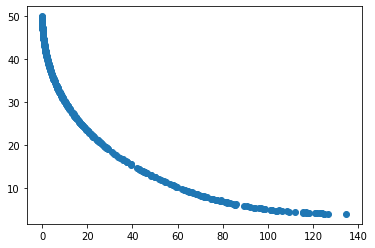

In [4]:
plt.scatter(f1,f2)

In [5]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  0.308850293 |      32 |            - |            -
    2 |     200 |  0.00000E+00 |  0.00000E+00 |      53 |  0.007836112 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      82 |  0.011608642 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |     100 |  0.003269381 |            f
    5 |     500 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002486995 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002569193 |            f
    7 |     700 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002282180 |            f
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.005544084 |        nadir
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.003282223 |        nadir
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.004517344 |        nadir
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

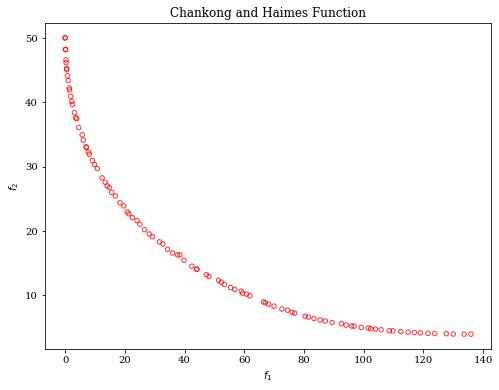

In [6]:
problem = bm.BihnKorn()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

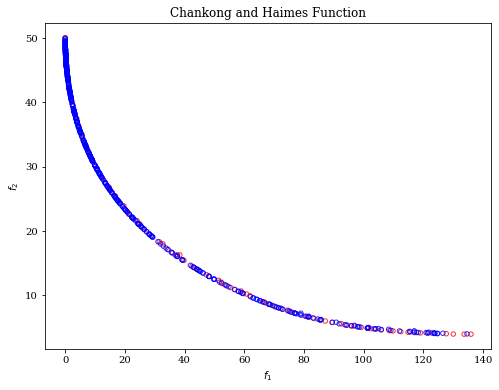

In [7]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Bihnkorn Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()